In [ ]:
import sys
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import numpy as np

<h2>Plot Figure 2a</h2>

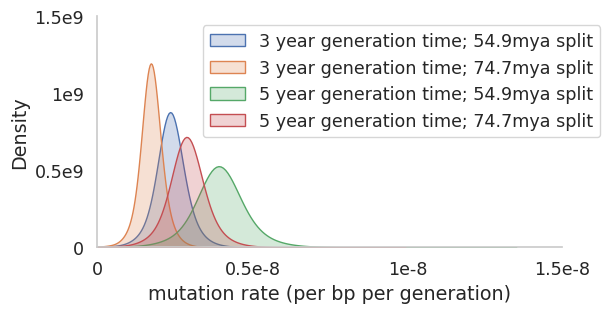

In [22]:
#g1 and g2 are generation times
g1 = 3
g2 = 5
#d1 and d2 are divergence times
d1 = 54900000
d2 = 74700000
#Load in divergence map
df1 = pd.read_csv(r"/hDMad_demog_divergence_100kb.bed", sep='\t', names=['chrom','start','end','length', 'mutations', 'divergence'])
#Calculate mutation rates
df1['mu1'] = df1.divergence / (d1/g1)
df1['mu2'] = df1.divergence / (d2/g1)
df1['mu3'] = df1.divergence / (d1/g2)
df1['mu4'] = df1.divergence / (d2/g2)

#Generate plot
sns.set(rc={'figure.figsize':(6,3),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.15)

sns.kdeplot(np.array(df1['mu1']), fill=True, bw_method=0.5, label='3 year generation time; 54.9mya split')
sns.kdeplot(np.array(df1['mu2']), fill=True, bw_method=0.5, label='3 year generation time; 74.7mya split')
sns.kdeplot(np.array(df1['mu3']), fill=True, bw_method=0.5, label='5 year generation time; 54.9mya split')
sns.kdeplot(np.array(df1['mu4']), fill=True, bw_method=0.5, label='5 year generation time; 74.7mya split')
plt.xlabel('mutation rate (per bp per generation)')
plt.legend(bbox_to_anchor=(1.1, 1))
plt.xlim([0,1.5e-8])
plt.xticks([0, 0.5e-8, 1e-8, 1.5e-8], ['0','0.5e-8','1e-8','1.5e-8'])
plt.yticks([0, 0.5e9, 1e9, 1.5e9], ['0','0.5e9','1e9', '1.5e9'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('fig2a.pdf', format='pdf', bbox_inches='tight')

<h2>Plot mutation rate maps individually (scaffold 1 is Figure 2b)</h2>

In [ ]:
#Read in map, loop through scaffolds, plot and save
df1 = pd.read_csv(r"DMad_demog_divergence_1mb.bed", sep='\t', names=['chrom','start','end','length', 'mutations', 'divergence'])
#Calculate mutation rate from divergence and generation times
df1['mu'] = df1.divergence / (d1/g2)

#Plot
sns.set(rc={'figure.figsize':(6,3),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.15)
for i in [1,2,3,4,5,6,7,8,10,11,12,13,14,15]:
    tdf = df1[df1.chrom=='scaffold_' + str(i)]
    plt.plot(tdf.start, tdf.mu, color='b')
    if(tdf.end.max()>1e8):
        plt.xticks([0, 0.5e8, 1e8, 1.5e8, 2e8, 2.5e8, 3e8], ['0', '0.5e8', '1e8', '1.5e8', '2e8', '2.5e8', '3e8'])
    elif(tdf.end.max()>0.5e8):
        plt.xticks([0, 0.2e8, 0.4e8, 0.6e8, 0.8e8, 1e8], ['0', '0.2e8', '0.4e8', '0.6e8', '0.8e8', '1e8'])
    else:
        plt.xticks([0, 0.1e8, 0.2e8, 0.3e8, 0.4e8, 0.5e8], ['0', '0.1e8', '0.2e8', '0.3e8', '0.4e8', '0.5e8'])
    
    plt.yticks([0, 0.2e-8, 0.4e-8,  0.6e-8,  0.8e-8], ['0', '0.2e-8', '0.4e-8',  '0.6e-8', '0.8e-8'])
    plt.xlim([0,tdf.end.max()])
    plt.ylim([0,0.8e-8])
    plt.margins(0)
    plt.ylabel('mutation rate\n(/bp/generation)')
    plt.xlabel('position on scaffold ' + str(i))
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.savefig(r"/scaffold_" + str(i) + ".pdf", format='pdf', bbox_inches='tight')
    plt.close()

<h2>Figure 2c</h2>

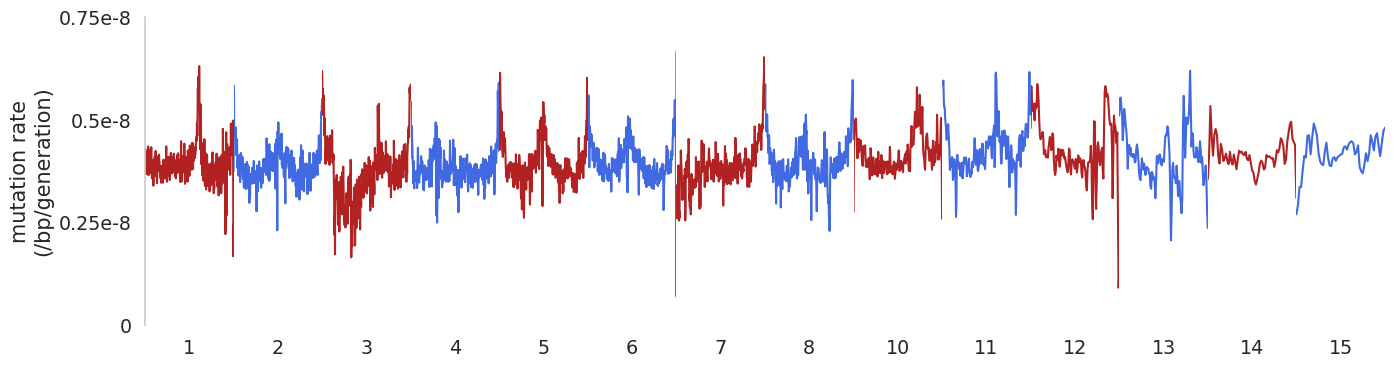

In [24]:
df1 = pd.read_csv(r"DMad_demog_divergence_1mb.bed", sep='\t', names=['chrom','start','end','length', 'mutations', 'divergence'])
df1['mu'] = df1.divergence / (d1/g2)

sns.set(rc={'figure.figsize':(16,4),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
scaffolds = [1,2,3,4,5,6,7,8,10,11,12,13,14,15] 
fig, axes = plt.subplots(1,14)
for c, ax in enumerate(axes.flat):
    tdf = df1[df1.chrom=='scaffold_'+str(scaffolds[c])]
    if(c%2):
        col='royalblue'
    else:
        col='firebrick'
    ax.plot(tdf.start, tdf.mu, c=col)
    ax.set_ylim([0,0.75e-8])
    ax.set_xticks([tdf.start.quantile(0.5)])
    ax.set_xticklabels([str(scaffolds[c])])
    if(scaffolds[c] != 1):
        ax.set_yticklabels('')
    ax.margins(0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if(scaffolds[c]!=1):
        ax.spines['left'].set_visible(False)
    else:
        ax.set_yticks([0, 0.25e-8, 0.5e-8, 0.75e-8])
        ax.set_yticklabels(['0', '0.25e-8', '0.5e-8', '0.75e-8'])
        ax.set_ylabel('mutation rate\n(/bp/generation)')
    # if((scaffolds[c]==1) | (scaffolds[c]==8)):
    #     ax.set_ylabel('mutation rate (*e-8/bp/generation)')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('fig2c.pdf', format='pdf', bbox_inches='tight')